<a href="https://colab.research.google.com/github/carlosrome/ML-Research-Project-Physics/blob/main/IntensityValues_CircularSensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless

from google.colab import drive
drive.mount('/content/gdrive')


import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Mounted at /content/gdrive


Saved frame 490 as frame_to_save.png


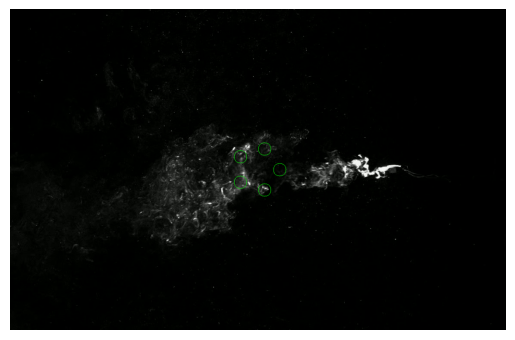

Frame 490
[[1.45706717e-04 9.97350787e-05 1.34019012e-04 9.93454885e-05
  3.89590151e-06]
 [6.23733832e-04 1.37525323e-04 1.27785570e-04 6.07760636e-05
  3.89590151e-06]
 [1.00903849e-04 1.85055322e-04 1.27785570e-04 5.22050803e-05
  2.49337697e-05]
 ...
 [2.35055322e-02 2.86750039e-02 5.14882344e-03 1.54893252e-02
  2.60472183e-02]
 [1.92449743e-02 2.13273336e-02 6.94327567e-03 1.81307465e-02
  2.54640019e-02]
 [1.50771388e-02 1.77080411e-02 1.00849307e-02 2.35846190e-02
  2.46801465e-02]]


In [2]:
# Function to calculate average grayscale value in a section
def calculate_section_average(section):
    return np.mean(section)

# Open the video file
video_path = '/content/gdrive/My Drive/bbox_nozzleheight_1in_100ke_30g_10fps_01.mp4'
cap = cv2.VideoCapture(video_path)

# Initialize an empty numpy array to store average grayscale values
average_values = []

# Define the frame number to save as a PNG (e.g., 100)
frame_to_save = 490

# Calculate the center of the frame
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
center_x = frame_width // 2
center_y = frame_height // 2

# Define the number of circular sections and their properties
num_sections = 5
section_radius = 15  # Adjust this value to control the radius of circular sections
distance_from_center = 50  # Adjust this value to control the distance from the center

# Calculate the angles for placing sections equidistantly around the center
section_angles = np.linspace(0, 2 * np.pi, num_sections, endpoint=False)
counter = 1
# Loop through each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Create a copy of the frame for visualization
    frame_with_circles = frame.copy()

    # Calculate the average grayscale value for each circular section
    section_average_values = []
    for angle in section_angles:
        x = int(center_x + distance_from_center * np.cos(angle))
        y = int(center_y + distance_from_center * np.sin(angle))

        # Create a circular mask for the section
        mask = np.zeros_like(frame)
        cv2.circle(mask, (x, y), section_radius, (255, 255, 255), thickness=-1)

        # Apply the mask to the frame for visualization
        section = cv2.bitwise_and(frame_with_circles, mask)

        # Draw the circular section on the frame
        cv2.circle(frame_with_circles, (x, y), section_radius, (0, 255, 0), 1)

        # Calculate the average value for the circular section
        section_average = calculate_section_average(section)
        section_average_values.append(section_average)

    # Store the section average values in the numpy array
    average_values.append(section_average_values)

    # Save the frame as a PNG if it's the specified frame number
    if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) == frame_to_save:
        cv2.imwrite('/content/frame_to_save.png', frame_with_circles)
        print(f"Saved frame {frame_to_save} as frame_to_save.png")

    # Display the frame with circular sections
    if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) == frame_to_save:
        plt.imshow(cv2.cvtColor(frame_with_circles, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        print('Frame ' + str(counter))

    counter = counter +1
    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Convert the list of section average values to a numpy array
average_values = np.array(average_values)

# Print the numpy array containing average grayscale values for each frame and section
print(average_values)

### **Add the category**

In [3]:
category = np.ones((1800, 1), dtype=int)
array_height = np.append(average_values, category, axis=1)
array_height.shape

(1800, 6)

### **Save the array**

In [4]:
np.save('array_height1', array_height)
%cp /content/array_height1.npy /content/gdrive/My\ Drive
%cp /content/frame_to_save.png /content/gdrive/My\ Drive